In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

**Data Exploration:**

Analyze the dataset's structure and characteristics using techniques such as scatter plots, box plots, pair plots, and correlation matrices.


In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.duplicated().sum()

np.int64(1)

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.isnull().sum().any()

np.False_

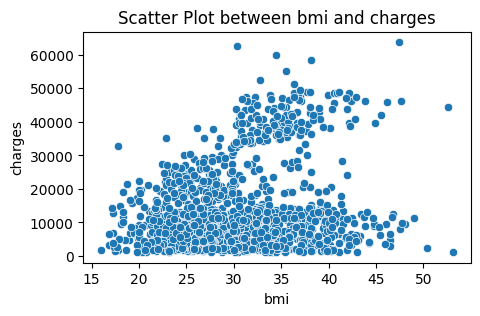

In [9]:
# Scatter plot between two continuous variables, bmi and charges
plt.figure(figsize =(5,3))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('Scatter Plot between bmi and charges')
plt.show()

there is no relation between bmi and charges

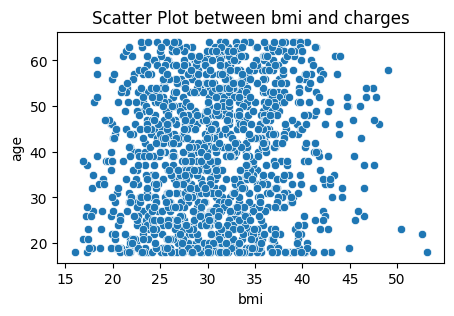

In [11]:
# Scatter plot between two continuous variables, e.g., 'bmi' vs 'age'
plt.figure(figsize =(5,3))
sns.scatterplot(x='bmi', y='age', data=df)
plt.title('Scatter Plot between bmi and age')
plt.show()

there is no relation between bmi and age

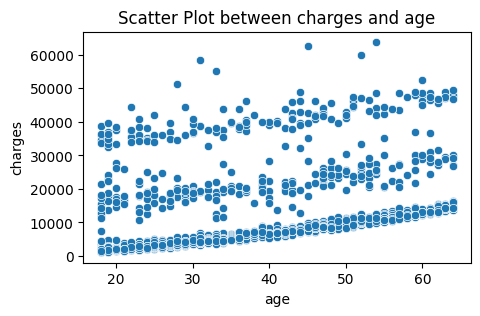

In [13]:
# Scatter plot between two continuous variables, e.g., 'charges' vs 'age'
plt.figure(figsize =(5,3))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Scatter Plot between charges and age')
plt.show()

as age increases charges also increases

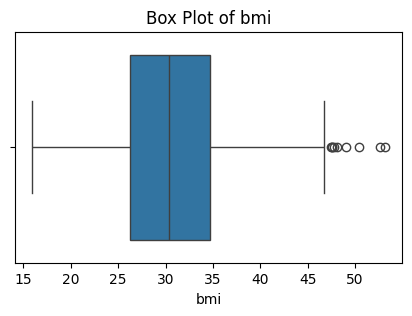

In [16]:
# Box plot for a single continuous variable
plt.figure(figsize =(5,3))
sns.boxplot(x=df['bmi'])
plt.title('Box Plot of bmi')
plt.show()



inference: there are outlier from 46
bmi is symmetric and norma

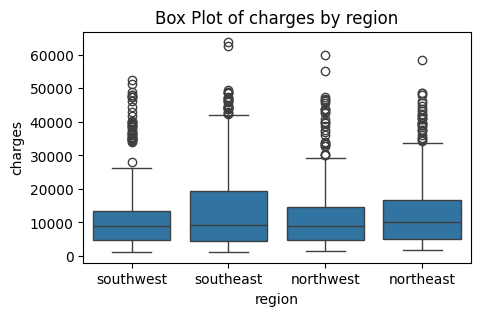

In [17]:
# Box plot for a continuous variable grouped by a categorical variable
plt.figure(figsize =(5,3))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Box Plot of charges by region')
plt.show()

there are outliers for all regions
souteast charges are right skewed
me

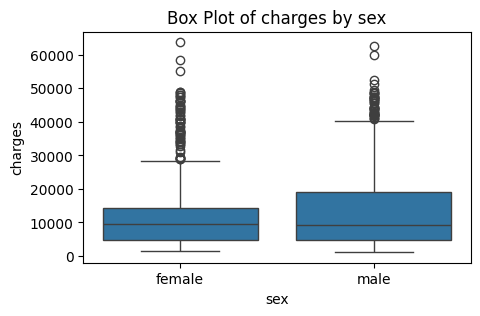

In [19]:
# Box plot for a continuous variable grouped by a categorical variable
plt.figure(figsize =(5,3))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Box Plot of charges by sex')
plt.show()

thre is more outlier in female charges compare to male charges.
male charges are right skewed

<Figure size 500x300 with 0 Axes>

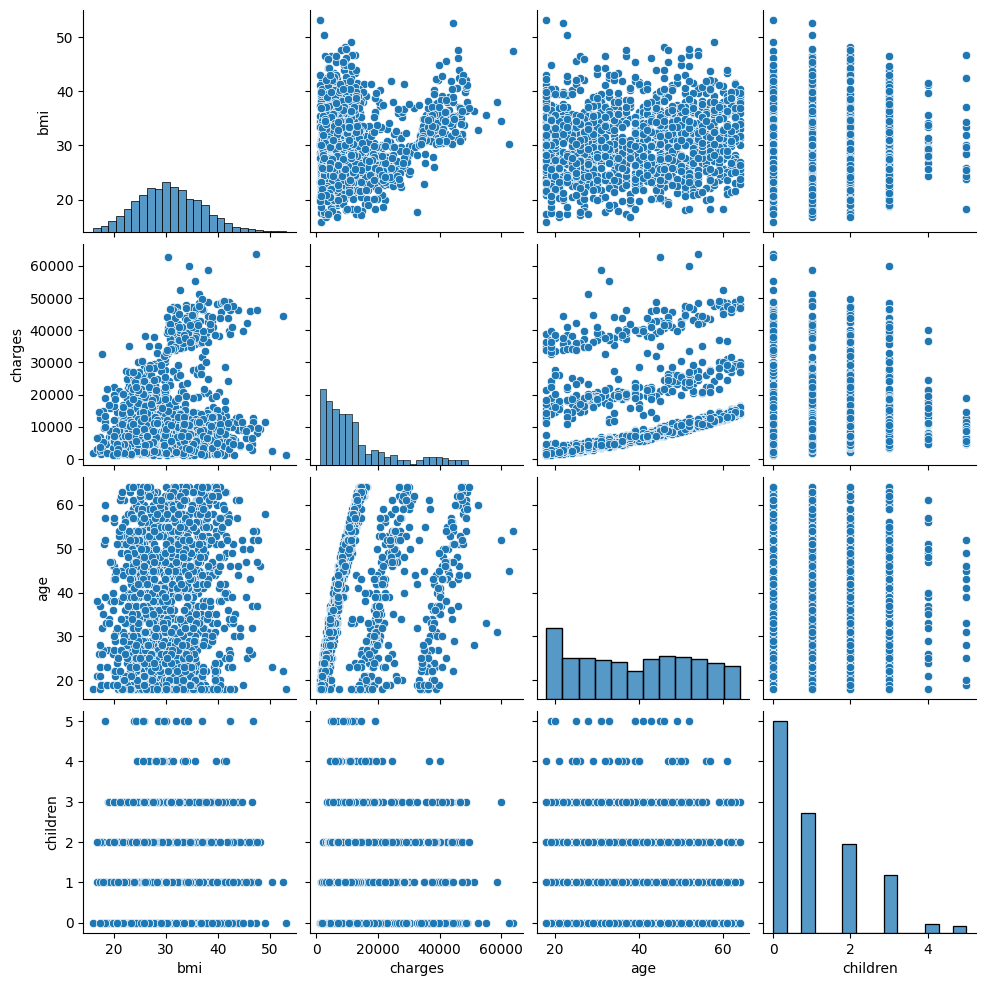

In [21]:
# Pair plot for multiple numerical columns
plt.figure(figsize =(5,3))
sns.pairplot(df[['bmi', 'charges', 'age','children']])
plt.show()

inference
as age increases charges also increases.
number of children is decreases
bmi is normally distributed

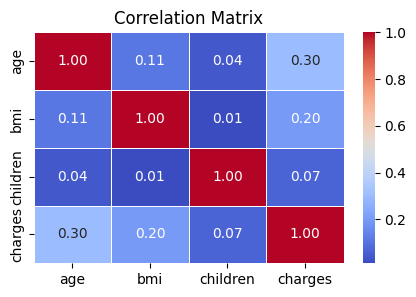

In [19]:
# Calculate correlation matrix
corr = df.corr(numeric_only=True)

# Display the correlation matrix as a heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(corr, annot=True,  cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Inference
age and charges are positively correlated
bmi and charged are weakly correlated

**Identify relationships between variables and assess their suitability for regression modeling.**

Identifying relationships between variables and assessing their suitability for regression modeling involves a few key steps:

**Understanding the Relationships:**

**Linear Relationships:** Regression models work well when the relationship between independent variables (predictors) and the dependent variable (target) is linear. This can be visually assessed using scatter plots or through the correlation matrix.

**Non-Linearity:** If the relationship is non-linear, other techniques (e.g., polynomial regression, decision trees) might be more suitable.

**Multicollinearity:** When independent variables are highly correlated with each other, it can cause issues in regression models by making it difficult to distinguish the individual effect of each predictor.

Assessing Variable Suitability:

**Correlation Analysis:** The correlation matrix helps identify whether a strong linear relationship exists between predictors and the dependent variable. A high correlation (near +1 or -1) with the dependent variable is typically a good indicator of suitability for regression modeling.

**Outliers:** Outliers can significantly affect the performance of regression models, so it’s important to check for extreme values using box plots or scatter plots.

**Data Transformation:** In some cases, variables might need to be transformed (e.g., log transformation) if the relationship with the dependent variable is non-linear.

In [10]:
# Dealing with "binary" categorical values
df.loc[df['sex']=='female','sex'] = 0
df.loc[df['sex']=='male','sex'] = 1

df.loc[df['smoker']=='no','smoker'] = 0
df.loc[df['smoker']=='yes','smoker'] = 1
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [11]:
# Perform One-Hot Encoding for "region" column in the dataframe
df = pd.get_dummies(df, columns = ['region'])
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [12]:
# Replacing False with 0 and True with 1
df.replace({False : 0, True : 1}, inplace = True)
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [13]:
# Getting an idea about the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   sex               1337 non-null   int64  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   smoker            1337 non-null   int64  
 5   charges           1337 non-null   float64
 6   region_northeast  1337 non-null   int64  
 7   region_northwest  1337 non-null   int64  
 8   region_southeast  1337 non-null   int64  
 9   region_southwest  1337 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 147.2 KB


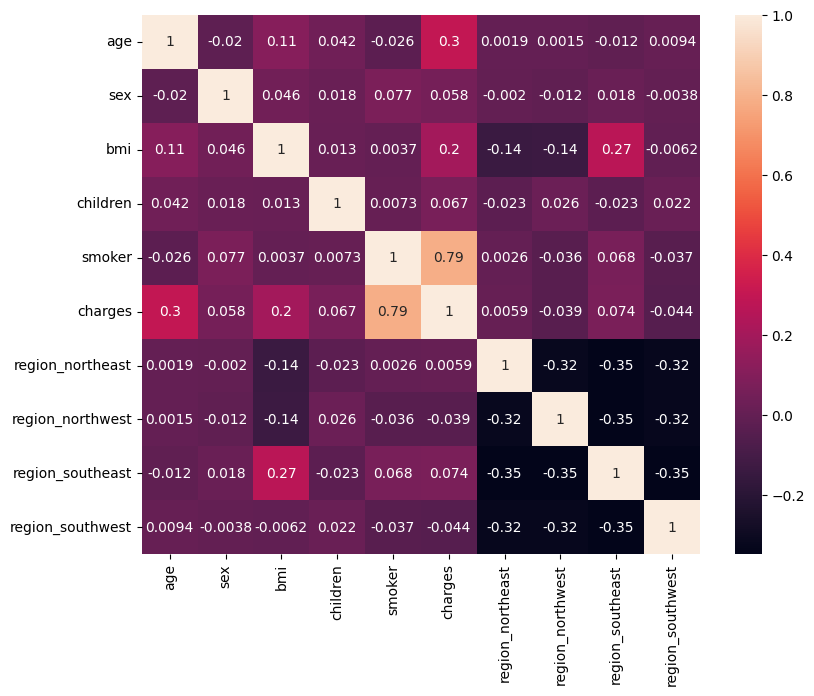

In [14]:
# Correlation Analysis (Pearson's Correlation Coefficient)
plt.figure(figsize = (9, 7))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
'''
From the above column, if you observe, we can see the following conclusions ->
(1) "charges" are showing strong positive correlation with "smoker" column
(2) "charges" are showing weak positive correlation with "age" and "bmi" column
'''

In [ ]:
'''
We are going to create 2 models ->
(1) Simple Linear Regression -> charges ~ smoker
(2) Multiple Linear Regression -> charges ~ age + bmi + smoker
'''

In [ ]:
# Simple Linear Regression ->

In [138]:
print(X.shape)  # Output: (1070, 1) if 'X' has 1070 rows and 1 column
print(y.shape)  # Output: (1070,) if 'y' has 1070 rows (no columns)

(1337, 1)
(1337,)


In [116]:
# Check for missing values in X and y
print(X.isnull().sum())  # For input features
print(y.isnull().sum())  # For target variable

smoker    0
dtype: int64
0


In [77]:
df = df.dropna()  # Drops rows with any missing values

In [124]:
print(X.shape)  # Output: (1070, 1) if 'X' has 1070 rows and 1 column
print(y.shape)  # Output: (1070,) if 'y' has 1070 rows (no columns)

(1337, 1)
(1337,)


In [132]:
 #seperating input and output feature
X = df[['smoker']]
y = df['charges']

from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X , y, test_size= 0.2, random_state = 5)

In [134]:
print(X_train.shape)  # Output: (1070, 1) if 'X' has 1070 rows and 1 column
print(y_train.shape)  # Output: (1070,) if 'y' has 1070 rows (no columns)
print(X_test.shape)
print(y_test.shape)

(1069, 1)
(1069,)
(268, 1)
(268,)


In [135]:
#create model
from sklearn.linear_model import LinearRegression

#initializing model
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [136]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [100]:
print(y_train_pred.shape)  # Output: (1070, 1) if 'X' has 1070 rows and 1 column
print(y_train_pred.shape)  # Output: (1070,) if 'y' has 1070 rows (no columns)

(1069,)
(1069,)


In [139]:
#model evaluate
from sklearn.metrics import r2_score
print('Training R2 score : ',np.round(r2_score(y_train, y_train_pred),2))
print('Testing R2 score :',np.round(r2_score(y_test,y_test_pred),2))

Training R2 score :  0.63
Testing R2 score : 0.59


In [ ]:
'''
The difference between training and testing peformance is within 5% (which is acceptable)
But the performance is bad on training and testing data both (Underfitted)
'''

In [ ]:
#multiple regression


In [15]:
#seperating input and output feature
X=df[['smoker','bmi','age']]
y=df['charges']

#performin train test aplit
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 5)

In [16]:
#creating model

from sklearn.linear_model import LinearRegression

#initiate the model
model = LinearRegression()

#fitting the model
model.fit(X_train, y_train)


LinearRegression()

In [17]:
#taking prediction from trained model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [18]:

from sklearn.metrics import r2_score
print('Training R2_score : ',np.round(r2_score(y_train,y_train_pred),2))
print('Testing R2_score : ', np.round(r2_score(y_test,y_test_pred),2))

Training R2_score :  0.75
Testing R2_score :  0.72
